# Finding personality types using k-means clustering

In [1]:
import pandas as pd

In [2]:
# Loading the data table (questionnaire answers) from the csv file:
DATA = pd.read_csv("data-final.csv", sep='\t')

In [3]:
# Data overview:
DATA
# EXT = extraversion
# EST = neuroticism
# AGR = agreeableness
# CSN = conscientiousness
# OPN = openess (to new experiences)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,2018-11-08 12:04:58,1920.0,1080.0,3.0,160.0,10,2,US,39.9883,-75.2208
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,2018-11-08 12:07:18,1920.0,1080.0,3.0,122.0,7,1,US,38.0,-97.0
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,...,2018-11-08 12:07:49,1920.0,1080.0,2.0,135.0,12,6,US,36.1473,-86.777
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,2018-11-08 12:08:34,1920.0,1080.0,6.0,212.0,8,1,US,34.1067,-117.8067


### About the data
This data was collected (2016-2018) through an interactive on-line personality test.

The personality test was constructed with the "Big-Five Factor Markers" from the IPIP. https://ipip.ori.org/newBigFive5broadKey.htm

Participants were informed that their responses would be recorded and used for research at the beginning of the test, and asked to confirm their consent at the end of the test.



The following items were presented on one page and each was rated on a five point scale using radio buttons. The order on page was was EXT1, AGR1, CSN1, EST1, OPN1, EXT2, etc.

The scale was labeled 1=Disagree, 3=Neutral, 5=Agree



EXT1	I am the life of the party.

EXT2	I don't talk a lot.

EXT3	I feel comfortable around people.

EXT4	I keep in the background.

EXT5	I start conversations.

EXT6	I have little to say.

EXT7	I talk to a lot of different people at parties.

EXT8	I don't like to draw attention to myself.

EXT9	I don't mind being the center of attention.

EXT10	I am quiet around strangers.

EST1	I get stressed out easily.

EST2	I am relaxed most of the time.

EST3	I worry about things.

EST4	I seldom feel blue.

EST5	I am easily disturbed.

EST6	I get upset easily.

EST7	I change my mood a lot.

EST8	I have frequent mood swings.

EST9	I get irritated easily.

EST10	I often feel blue.

AGR1	I feel little concern for others.

AGR2	I am interested in people.

AGR3	I insult people.

AGR4	I sympathize with others' feelings.

AGR5	I am not interested in other people's problems.

AGR6	I have a soft heart.

AGR7	I am not really interested in others.

AGR8	I take time out for others.

AGR9	I feel others' emotions.

AGR10	I make people feel at ease.

CSN1	I am always prepared.

CSN2	I leave my belongings around.

CSN3	I pay attention to details.

CSN4	I make a mess of things.

CSN5	I get chores done right away.

CSN6	I often forget to put things back in their proper place.

CSN7	I like order.

CSN8	I shirk my duties.

CSN9	I follow a schedule.

CSN10	I am exacting in my work.

OPN1	I have a rich vocabulary.

OPN2	I have difficulty understanding abstract ideas.

OPN3	I have a vivid imagination.

OPN4	I am not interested in abstract ideas.

OPN5	I have excellent ideas.

OPN6	I do not have a good imagination.

OPN7	I am quick to understand things.

OPN8	I use difficult words.

OPN9	I spend time reflecting on things.

OPN10	I am full of ideas.



The time spent on each question is also recorded in milliseconds. These are the variables ending in _E. This was calculated by taking the time when the button for the question was clicked minus the time of the most recent other button click.



dateload    The timestamp when the survey was started.

screenw     The width the of user's screen in pixels

screenh     The height of the user's screen in pixels

introelapse The time in seconds spent on the landing / intro page

testelapse  The time in seconds spent on the page with the survey questions

endelapse   The time in seconds spent on the finalization page (where the user was asked to indicate if they has answered accurately and their answers could be stored and used for research. Again: this dataset only includes users who answered "Yes" to this question, users were free to answer no and could still view their results either way)

IPC         The number of records from the user's IP address in the dataset. For max cleanliness, only use records where this value is 1. High values can be because of shared networks (e.g. entire universities) or multiple submissions

country     The country, determined by technical information (NOT ASKED AS A QUESTION)

lat_appx_lots_of_err    approximate latitude of user. determined by technical information, THIS IS NOT VERY ACCURATE. Read the article "How an internet mapping glitch turned a random Kansas farm into a digital hell" https://splinternews.com/how-an-internet-mapping-glitch-turned-a-random-kansas-f-1793856052 to learn about the perils of relying on this information

long_appx_lots_of_err   approximate longitude of user

In [4]:
# Extracting only relevant questionnaire data (removing metadata):
df = DATA[DATA.columns[0:50]].fillna(0)

In [5]:
# Allowing pandas to show all columns in a table:
pd.set_option("display.max_columns", None)

In [6]:
# Displaying the dataframe:
df

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0,5.0,4.0,2.0,5.0,2.0,4.0,2.0,4.0,4.0,4.0,2.0,3.0,3.0,3.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,4.0
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,4.0,3.0,5.0,1.0,5.0,5.0,4.0,4.0,4.0,5.0,2.0,4.0,1.0,4.0,3.0,5.0,3.0,3.0,5.0,3.0,3.0,2.0,3.0,4.0,3.0,3.0,2.0,3.0,2.0,3.0,4.0,1.0,5.0,1.0,5.0,1.0,3.0,4.0,5.0,4.0
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,3.0,2.0,4.0,3.0,2.0,2.0,4.0,2.0,4.0,1.0,3.0,5.0,5.0,3.0,2.0,3.0,2.0,4.0,3.0,5.0,4.0,5.0,3.0,5.0,1.0,5.0,1.0,4.0,1.0,4.0,5.0,1.0,5.0,1.0,4.0,1.0,5.0,5.0,4.0,5.0
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,4.0,3.0,4.0,2.0,4.0,4.0,2.0,2.0,4.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,2.0,4.0,2.0,4.0,4.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,5.0,5.0,3.0


In [7]:
from sklearn.cluster import MiniBatchKMeans

In [8]:
# Dividing the data into 10 clusters using sklearn k-means (mini batches for faster computation time) algorithm, fitting the data in batches of 100:
kmeans = MiniBatchKMeans(n_clusters=10, batch_size=100, max_iter=100, random_state=41).fit(df)

In [12]:
# Checking how many clusters were created:
len(kmeans.cluster_centers_)

10

In [13]:
# Defining each cluster as one personality type:
a, b, c, d, e, f, g, h, i, j = [kmeans.cluster_centers_[x] for x in range(0, len(kmeans.cluster_centers_))]

In [14]:
# Displaying a typical representative of personality type A:
a

array([1.84767637, 3.72432811, 2.28544233, 3.87575588, 2.25551512,
       3.0068589 , 1.75736282, 3.94470885, 2.44554871, 4.2556271 ,
       2.8818589 , 3.31203807, 3.48267077, 2.69546473, 2.5618981 ,
       2.437514  , 2.74644457, 2.38043113, 3.24532475, 2.83454647,
       3.51380179, 2.48488242, 3.06492161, 2.27418813, 3.82628779,
       2.30540314, 3.74106943, 2.54692049, 2.19132139, 2.74921613,
       3.53846585, 2.64092945, 4.09454087, 2.40641097, 2.60120381,
       2.54728443, 3.88717805, 2.52513998, 3.12942329, 3.74322508,
       4.04490482, 1.76993281, 4.01637738, 1.92318029, 4.00974244,
       1.88580627, 4.28295073, 3.68933371, 4.14602464, 4.06760918])

In [22]:
types = {'A' : a, 'B' : b, 'C' : c, 'D' : d, 'E' : e,
         'F' : f, 'G' : g, 'H' : h, 'I' : i, 'J' : j}
scores = {}

for n, p in types.items(): # n=name, p=personality
    trait = {}
    trait['Extraversion'] =  (p[0] - p[1] + p[2] - p[3] + p[4] - p[5] + p[6] - p[7] + p[8] - p[9])
    trait['Neuroticism'] =  (p[0] - p[1] + p[2] - p[3] + p[4] + p[5] + p[6] + p[7] + p[8] + p[9])
    trait['Agreeableness'] =  (- p[0] + p[1] - p[2] + p[3] - p[4] - p[5] + p[6] - p[7] + p[8] + p[9])
    trait['Conscientiousness'] =  (p[0] - p[1] + p[2] - p[3] + p[4] - p[5] + p[6] - p[7] + p[8] + p[9])
    trait['Openness'] =  (p[0] - p[1] + p[2] - p[3] + p[4] - p[5] + p[6] + p[7] + p[8] + p[9])

    scores[n] = trait

In [23]:
scores

{'A': {'Extraversion': -8.215733482642769,
  'Neuroticism': 14.198656215005608,
  'Agreeableness': 2.718421052631589,
  'Conscientiousness': 0.29552071668534285,
  'Openness': 8.184938409854434},
 'B': {'Extraversion': 7.599406166110796,
  'Neuroticism': 22.328276254779144,
  'Agreeableness': -1.7931749776295276,
  'Conscientiousness': 13.190555600748414,
  'Openness': 18.906328805010983},
 'C': {'Extraversion': -3.928907507532304,
  'Neuroticism': 16.80554294440549,
  'Agreeableness': 1.2621032646828318,
  'Conscientiousness': 4.118886458376351,
  'Openness': 11.651512650130034},
 'D': {'Extraversion': 6.662887565352275,
  'Neuroticism': 21.804891127410603,
  'Agreeableness': -0.7952199475266566,
  'Conscientiousness': 12.744661700212571,
  'Openness': 18.16462071739088},
 'E': {'Extraversion': 12.017797265927225,
  'Neuroticism': 23.750158276080363,
  'Agreeableness': -2.6684878186038885,
  'Conscientiousness': 16.20533683494732,
  'Openness': 20.890637090533897},
 'F': {'Extraversio

In [32]:
# Making the scores comparabable by normalizing them:
extro = []
neuro = []
agree = []
consc = []
openn = []

for p, t in scores.items(): # p=personality, t=trait
    extro.append(t['Extraversion'])
    neuro.append(t['Neuroticism'])
    agree.append(t['Agreeableness'])
    consc.append(t['Conscientiousness'])
    openn.append(t['Openness'])

In [42]:
consc

[-8.215733482642769,
 7.599406166110796,
 -3.928907507532304,
 6.662887565352275,
 12.017797265927225,
 -4.320401450619871,
 2.8753530486791954,
 -7.591403999322143,
 -9.255516431924885,
 0.43160547156227513]

In [45]:
extro = (extro - min(extro)) / (max(extro) - min(extro))
neuro = (neuro - min(neuro)) / (max(neuro) - min(neuro))
agree = (agree - min(agree)) / (max(agree) - min(agree))
consc = (consc - min(consc)) / (max(consc) - min(consc))
openn = (openn - min(openn)) / (max(openn) - min(openn))

In [48]:
consc

array([0.02903317, 0.81600965, 0.26237096, 0.78879701, 1.        ,
       0.22553488, 0.57061234, 0.07912835, 0.        , 0.05605579])

In [49]:
normalized = {}

i = 0

for p, t in scores.items(): # p=personality, t=trait
    n = {}
    n['Extraversion'] = extro[i]
    n['Neuroticism'] = neuro[i]
    n['Agreeableness'] = agree[i]
    n['Conscientousness'] = consc[i]
    n['Openness'] = openn[i]

    normalized[p] = n
    i += 1

In [50]:
normalized

{'A': {'Extraversion': 0.04887733824877033,
  'Neuroticism': 0.5746036331716889,
  'Agreeableness': 0.9951060577764267,
  'Conscientousness': 0.029033168970853826,
  'Openness': 0.3621340951647814},
 'B': {'Extraversion': 0.7923035798479041,
  'Neuroticism': 0.9366734737581187,
  'Agreeableness': 0.16169367838281468,
  'Conscientousness': 0.8160096534455716,
  'Openness': 0.9003815034633414},
 'C': {'Extraversion': 0.25038924353991876,
  'Neuroticism': 0.6907068529928934,
  'Agreeableness': 0.7260852357288088,
  'Conscientousness': 0.2623709580741427,
  'Openness': 0.5361669893821034},
 'D': {'Extraversion': 0.7482804147660542,
  'Neuroticism': 0.9133634089943891,
  'Agreeableness': 0.34604264725929473,
  'Conscientousness': 0.7887970078461323,
  'Openness': 0.8631454322858612},
 'E': {'Extraversion': 1.0,
  'Neuroticism': 1.0,
  'Agreeableness': 0.0,
  'Conscientousness': 1.0,
  'Openness': 1.0},
 'F': {'Extraversion': 0.23198618942959015,
  'Neuroticism': 0.7038109796845897,
  'Agree

In [52]:
import matplotlib.pyplot as plt

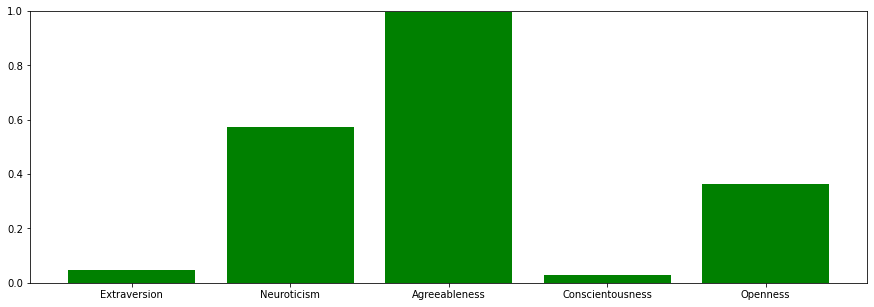

In [53]:
plt.figure(figsize=(15,5))
plt.ylim(0,1)
plt.bar(list(normalized['A'].keys()), normalized['A'].values(), color='g')
plt.show()

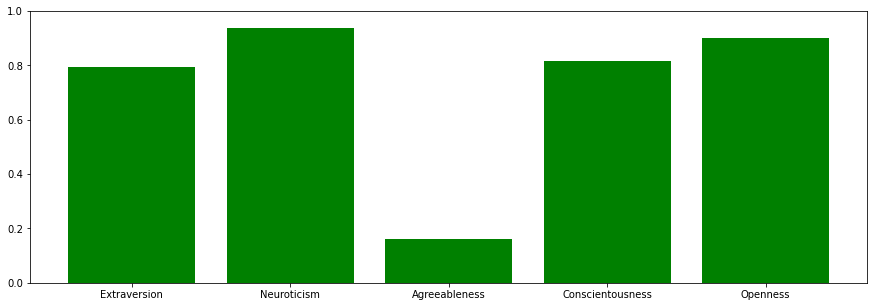

In [54]:
plt.figure(figsize=(15,5))
plt.ylim(0,1)
plt.bar(list(normalized['B'].keys()), normalized['B'].values(), color='g')
plt.show()

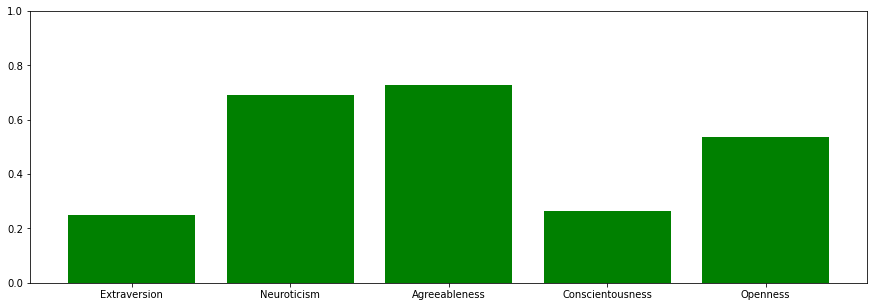

In [55]:
plt.figure(figsize=(15,5))
plt.ylim(0,1)
plt.bar(list(normalized['C'].keys()), normalized['C'].values(), color='g')
plt.show()

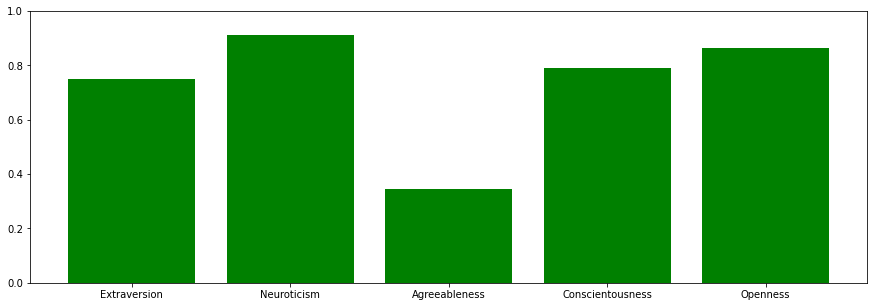

In [56]:
plt.figure(figsize=(15,5))
plt.ylim(0,1)
plt.bar(list(normalized['D'].keys()), normalized['D'].values(), color='g')
plt.show()

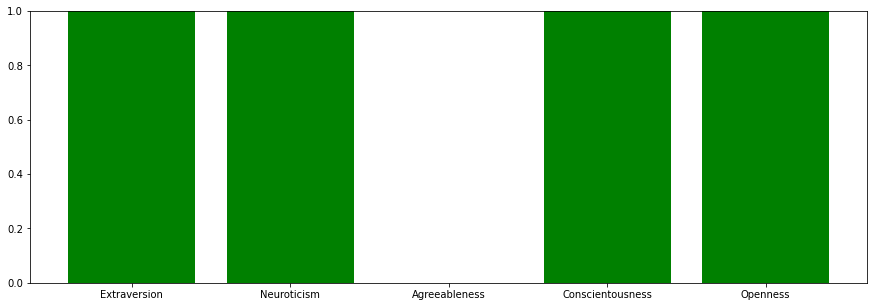

In [57]:
plt.figure(figsize=(15,5))
plt.ylim(0,1)
plt.bar(list(normalized['E'].keys()), normalized['E'].values(), color='g')
plt.show()

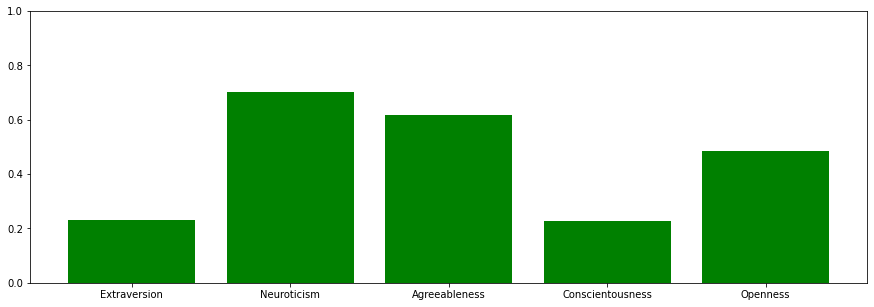

In [58]:
plt.figure(figsize=(15,5))
plt.ylim(0,1)
plt.bar(list(normalized['F'].keys()), normalized['F'].values(), color='g')
plt.show()

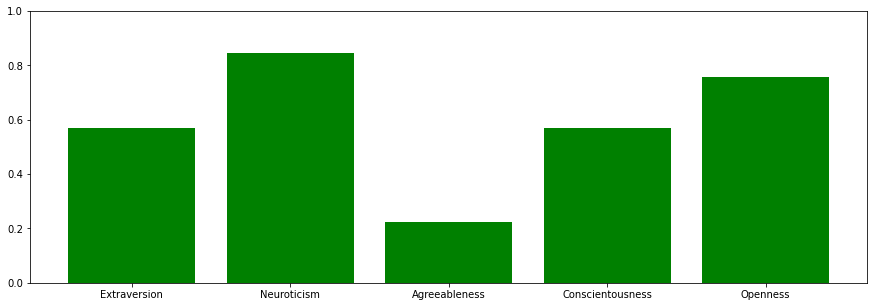

In [59]:
plt.figure(figsize=(15,5))
plt.ylim(0,1)
plt.bar(list(normalized['G'].keys()), normalized['G'].values(), color='g')
plt.show()

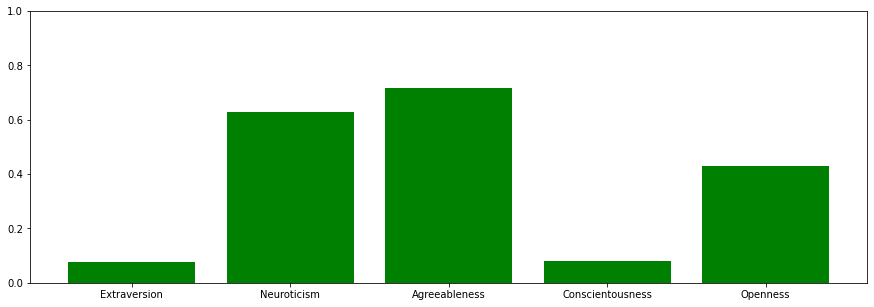

In [60]:
plt.figure(figsize=(15,5))
plt.ylim(0,1)
plt.bar(list(normalized['H'].keys()), normalized['H'].values(), color='g')
plt.show()

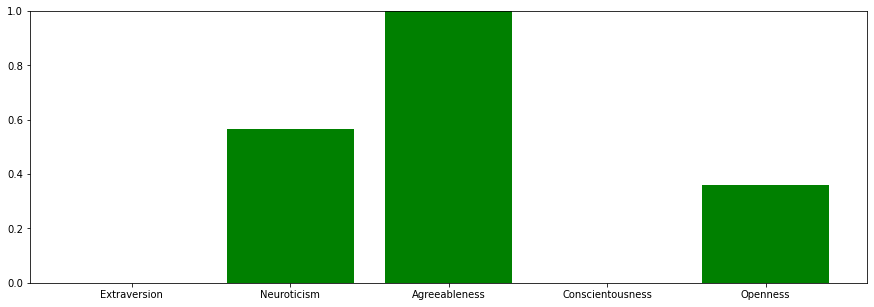

In [61]:
plt.figure(figsize=(15,5))
plt.ylim(0,1)
plt.bar(list(normalized['I'].keys()), normalized['I'].values(), color='g')
plt.show()

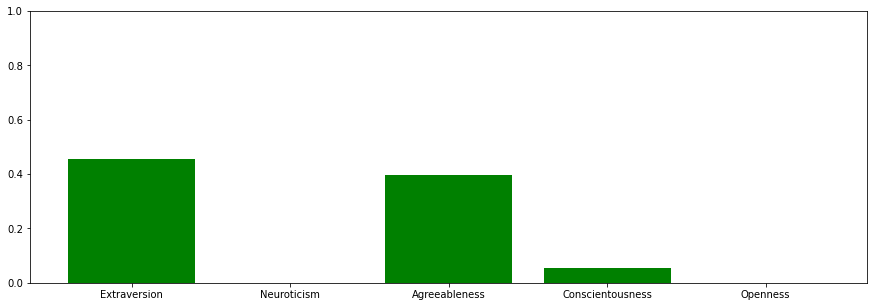

In [62]:
plt.figure(figsize=(15,5))
plt.ylim(0,1)
plt.bar(list(normalized['J'].keys()), normalized['J'].values(), color='g')
plt.show()